In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [28]:
Gupta = pd.read_csv('/content/Blood Pressure 1.csv')
Gupta

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose level,active,age_years,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,1,50,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,1,55,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,51,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,1,48,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,47,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,52,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,1,61,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,52,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,61,Hypertension Stage 1,Hypertension Stage 1


ID: Unique identifier for each patient.

age: Age of the patient in days.

gender: Gender of the patient. Categorical variable (1: Female, 2: Male).

height: Height of the patient in centimeters.

weight: Weight of the patient in kilograms.

ap_hi: Systolic blood pressure.

ap_lo: Diastolic blood pressure.

cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).

gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).

active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).

age_years: Age of the patient in years (derived from age).

bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".

bp_category_encoded: Encoded form of bp_category for machine learning purposes.

In [29]:
#check for data types
Gupta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   glucose level        68205 non-null  int64  
 9   active               68205 non-null  int64  
 10  age_years            68205 non-null  int64  
 11  bp_category          68205 non-null  object 
 12  bp_category_encoded  68205 non-null  object 
dtypes: float64(1), int64(10), object(2)
memory usage: 6.8+ MB


In [30]:
#check for missing data
Gupta.isna().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
glucose level,0
active,0


In [31]:
#check for duplicated entries
Gupta.duplicated().sum()

0

Text(0, 0.5, 'Number of patients')

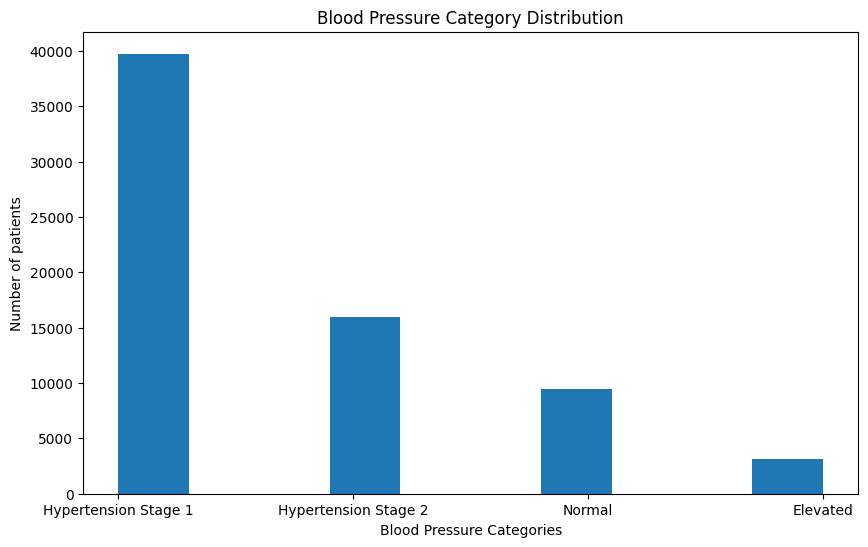

In [32]:
#Check category distribution
plt.figure(figsize=(10,6))
Gupta['bp_category'].hist(grid=False)
plt.title('Blood Pressure Category Distribution')
plt.xlabel('Blood Pressure Categories')
plt.ylabel('Number of patients')

Text(0, 0.5, 'Number of patients')

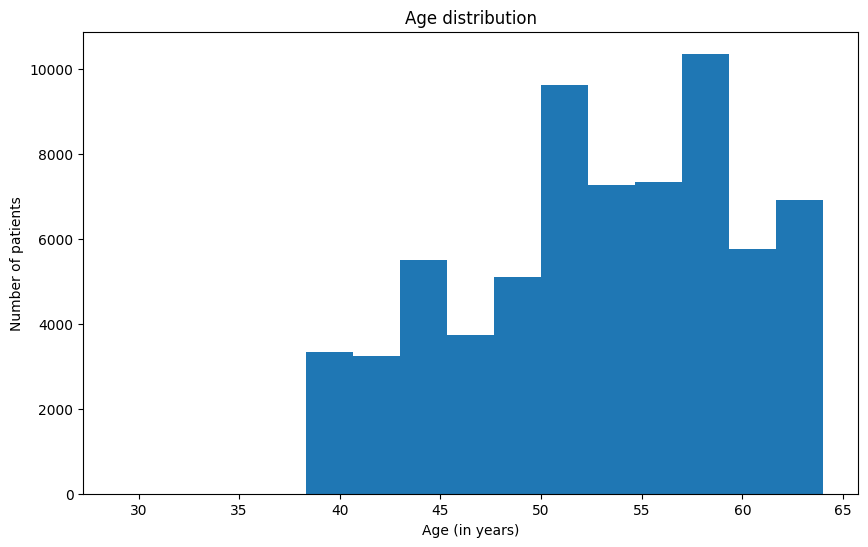

In [33]:
#check age distribution
plt.figure(figsize=(10,6))
Gupta['age_years'].hist(grid=False,bins=15)
plt.title("Age distribution")
plt.xlabel('Age (in years)')
plt.ylabel('Number of patients')

([<matplotlib.axis.XTick at 0x7f7dd5843f40>,
 [Text(1.05, 0, 'Female'), Text(1.95, 0, 'Male')])

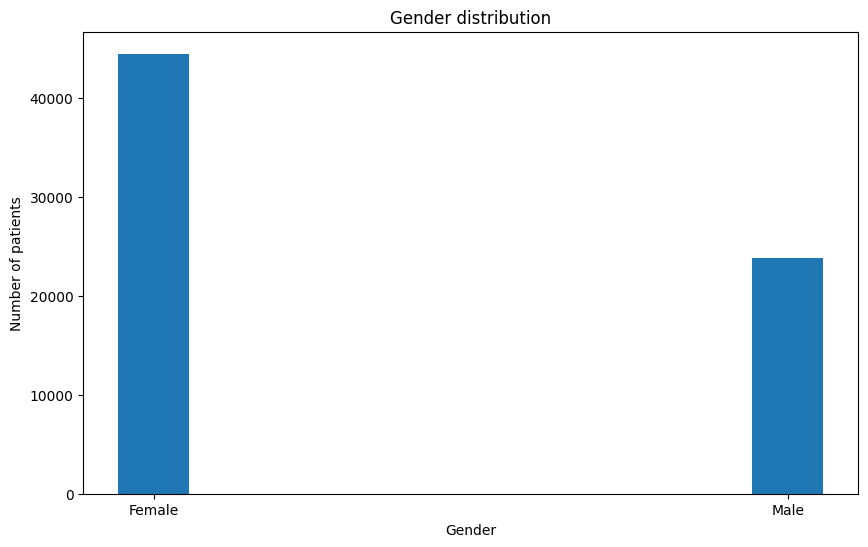

In [34]:
#check height distribution
plt.figure(figsize=(10,6))
Gupta['gender'].hist(grid=False)
plt.title("Gender distribution")
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.xticks([1.05,1.95],['Female','Male'])